In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [47]:
df = pd.read_csv('../datasets/train.csv')

tf = pd.read_csv('../datasets/test.csv')

pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [48]:
# convert null to string 'NA' for none, in accordance with data dictionary
df['Alley'].fillna('NA', inplace = True) # categorical features
df['Pool QC'].fillna('NA', inplace = True)
df['Fence'].fillna('NA', inplace = True)
df['Misc Feature'].fillna('NA', inplace = True)
df['Garage Type'].fillna('NA', inplace = True)
df['Garage Yr Blt'].fillna('NA', inplace = True)
df['Garage Finish'].fillna('NA', inplace = True)
df['Garage Qual'].fillna('NA', inplace = True)
df['Garage Cond'].fillna('NA', inplace = True)
df['Fireplace Qu'].fillna('NA', inplace = True)
df['Bsmt Qual'].fillna('NA', inplace = True)
df['Bsmt Cond'].fillna('NA', inplace = True)
df['Bsmt Exposure'].fillna('NA', inplace = True)
df['BsmtFin Type 1'].fillna('NA', inplace = True)
df['BsmtFin Type 2'].fillna('NA', inplace = True)
df['Mas Vnr Type'].fillna('NA', inplace = True)

# converting nulls to zero, in accordance with data dictionary 
df['Bsmt Full Bath'].fillna(0, inplace = True) # numeric features
df['Bsmt Half Bath'].fillna(0, inplace = True)
df['Garage Cars'].fillna(0, inplace = True)
df['Garage Area'].fillna(0, inplace = True)
df['BsmtFin SF 1'].fillna(0, inplace = True)
df['BsmtFin SF 2'].fillna(0, inplace = True)
df['Bsmt Unf SF'].fillna(0, inplace = True)
df['Total Bsmt SF'].fillna(0, inplace = True)
df['Mas Vnr Area'].fillna(0, inplace = True)
df['Lot Frontage'].fillna(0, inplace = True)
# Direct quote "All lots in a city must have some sort of frontage, to allow access to the property. This may not be the case in rural areas, however, where acreages and farmland may only be accessible via a right-of-way."
# https://www.gimme-shelter.com/frontage-50043/
# MS Zoning for all Null ['Lot Frontage'] indicates low residential density, rural areas.

# manual imputations, mode
df.loc[[1712],['Garage Type']] = 'NA' # all other garage-related feature values for this row are NA, likely an input error.
df.loc[[1147],['BsmtFin Type 2']] = 'Unf' # formerly null, imputed the modal 'Unf'
df.loc[[1699], ['Garage Yr Blt']] = 2007
df.loc[[1885], ['Garage Yr Blt']] = 2007


# preprocessing test set in order to match dataframe dimensionality for kaggle submission
tf['Alley'].fillna('NA', inplace = True) 
tf['Mas Vnr Type'].fillna('NA', inplace = True)
tf['Bsmt Qual'].fillna('NA', inplace = True)
tf['Bsmt Cond'].fillna('NA', inplace = True)
tf['Bsmt Exposure'].fillna('NA', inplace = True)
tf['BsmtFin Type 1'].fillna('NA', inplace = True)
tf['BsmtFin Type 2'].fillna('NA', inplace = True)
tf['Electrical'].fillna('SBrkr', inplace = True)
tf['Fireplace Qu'].fillna('NA', inplace = True)
tf['Garage Type'].fillna('NA', inplace = True)
tf['Garage Yr Blt'].fillna('NA', inplace = True)
tf['Garage Finish'].fillna('NA', inplace = True)
tf['Garage Qual'].fillna('NA', inplace = True)
tf['Garage Cond'].fillna('NA', inplace = True)
tf['Pool QC'].fillna('NA', inplace = True)
tf['Fence'].fillna('NA', inplace = True)
tf['Misc Feature'].fillna('NA', inplace = True)
tf['Lot Frontage'].fillna(0, inplace = True)
tf['Mas Vnr Area'].fillna(0, inplace = True)

tf.loc[[764],['Garage Yr Blt']] = 1984
tf.loc[[764],['Garage Finish']] = 'Unf'
tf.loc[[764],['Garage Qual']] = 'TA'
tf.loc[[764],['Garage Cond']] = 'TA'


# Converting ordinal features into ordinal integers
df['Exter Qual'] = df['Exter Qual'].map(lambda i: 1 if i == 'Po' else 2 if i == 'Fa' else 3 if i == 'TA' else 4 if i == 'Gd' else 5)
df['Exter Cond'] = df['Exter Cond'].map(lambda i: 1 if i == 'Po' else 2 if i == 'Fa' else 3 if i == 'TA' else 4 if i == 'Gd' else 5)
df['Bsmt Qual'] = df['Bsmt Qual'].map(lambda i : 0 if i == 'NA' else 1 if i =='Po' else 2 if i == 'Fa' else 3 if i == 'TA' else 4 if i == 'Gd' else 5)
df['Bsmt Cond'] = df['Bsmt Cond'].map(lambda i : 0 if i == 'NA' else 1 if i =='Po' else 2 if i == 'Fa' else 3 if i == 'TA' else 4 if i == 'Gd' else 5)
df['Heating QC'] = df['Heating QC'].map(lambda i: 1 if i == 'Po' else 2 if i == 'Fa' else 3 if i == 'TA' else 4 if i == 'Gd' else 5)
df['Kitchen Qual'] = df['Kitchen Qual'].map(lambda i: 1 if i == 'Po' else 2 if i == 'Fa' else 3 if i == 'TA' else 4 if i == 'Gd' else 5)
df['Lot Shape'] = df['Lot Shape'].map(lambda i: 1 if i == 'IR3' else 2 if i == 'IR2' else 3 if i == 'IR1' else 4)
df['Functional'] = df['Functional'].map(lambda i: 1 if i == 'Sal' else 2  if i == 'Sev' else 3 if i == 'Maj2' else 4 if i == 'Maj1' else 5 if i == 'Mod' else 6 if i == 'Min2' else 7 if i == 'Min1' else 8)
df['Land Slope'] = df['Land Slope'].map(lambda i: 1 if i == 'Gtl' else 2 if i == 'Mod' else 3)
df['Paved Drive'] = df['Paved Drive'].map(lambda i: 1 if i == 'N' else 2 if i =='P' else 3)
df['Pool QC'] = df['Pool QC'].map(lambda i: 1 if i == 'Fa' else 2 if i == 'TA' else 3 if i =='Gd' else 4 if i == 'Ex' else 0)
df['Fence'] = df['Fence'].map(lambda i: 1 if i == 'MnWw' else 2 if i == 'GdWo' else 3 if i == 'MnPrv' else 4 if i == 'GdPrv' else 0)

tf['Exter Qual'] = tf['Exter Qual'].map(lambda i: 0 if i == 'Po' else 1 if i == 'Fa' else 2 if i == 'TA' else 3 if i == 'Go' else 4)
tf['Exter Cond'] = tf['Exter Cond'].map(lambda i: 0 if i == 'Po' else 1 if i == 'Fa' else 2 if i == 'TA' else 3 if i == 'Go' else 4)
tf['Bsmt Qual'] = tf['Bsmt Qual'].map(lambda i : 0 if i == 'NA' else 1 if i =='Po' else 2 if i == 'Fa' else 3 if i == 'TA' else 4 if i == 'Gd' else 5)
tf['Bsmt Cond'] = tf['Bsmt Cond'].map(lambda i : 0 if i == 'NA' else 1 if i =='Po' else 2 if i == 'Fa' else 3 if i == 'TA' else 4 if i == 'Gd' else 5)
tf['Heating QC'] = tf['Heating QC'].map(lambda i: 1 if i == 'Po' else 2 if i == 'Fa' else 3 if i == 'TA' else 4 if i == 'Gd' else 5)
tf['Kitchen Qual'] = tf['Kitchen Qual'].map(lambda i: 1 if i == 'Po' else 2 if i == 'Fa' else 3 if i == 'TA' else 4 if i == 'Gd' else 5)
tf['Lot Shape'] = tf['Lot Shape'].map(lambda i: 1 if i == 'IR3' else 2 if i == 'IR2' else 3 if i == 'IR1' else 4)
tf['Functional'] = tf['Functional'].map(lambda i: 1 if i == 'Sal' else 2  if i == 'Sev' else 3 if i == 'Maj2' else 4 if i == 'Maj1' else 5 if i == 'Mod' else 6 if i == 'Min2' else 7 if i == 'Min1' else 8)
tf['Land Slope'] = tf['Land Slope'].map(lambda i: 1 if i == 'Gtl' else 2 if i == 'Mod' else 3)
tf['Paved Drive'] = tf['Paved Drive'].map(lambda i: 1 if i == 'N' else 2 if i =='P' else 3)
tf['Pool QC'] = tf['Pool QC'].map(lambda i: 1 if i == 'Fa' else 2 if i == 'TA' else 3 if i =='Gd' else 4 if i == 'Ex' else 0)
tf['Fence'] = tf['Fence'].map(lambda i: 1 if i == 'MnWw' else 2 if i == 'GdWo' else 3 if i == 'MnPrv' else 4 if i == 'GdPrv' else 0)



df['total_SF'] = df['1st Flr SF'] + df['2nd Flr SF'] + df['Total Bsmt SF'] #total SF
df['Age'] = df['Yr Sold'] - df['Year Built']  # age of house at time of sale
df['Age'] = df['Age'].map(lambda i: 0 if i < 0 else i)  # negative ages (house sold before construction) changed to zero
df['last_mod'] = df['Yr Sold'] - df['Year Remod/Add'] # age of last modification
df['age*mod'] = df['Age'] * df['last_mod']
df['tot_bath'] = df['Full Bath'] + 0.5*df['Half Bath'] + df['Bsmt Full Bath'] + 0.5*df['Bsmt Half Bath']



tf['total_SF'] = tf['1st Flr SF'] + tf['2nd Flr SF'] + tf['Total Bsmt SF']
tf['Age'] = tf['Yr Sold'] - tf['Year Built']
tf['Age'] = tf['Age'].map(lambda i: 0 if i < 0 else i)
tf['last_mod'] = tf['Yr Sold'] - tf['Year Remod/Add']
tf['age*mod'] = tf['Age'] * tf['last_mod']
tf['tot_bath'] = tf['Full Bath'] + 0.5*tf['Half Bath'] + tf['Bsmt Full Bath'] + 0.5*tf['Bsmt Half Bath']


In [49]:
df.to_csv('../datasets/train_CLEAN.csv')

tf.to_csv('../datasets/test_CLEAN.csv')

---------

<AxesSubplot:>

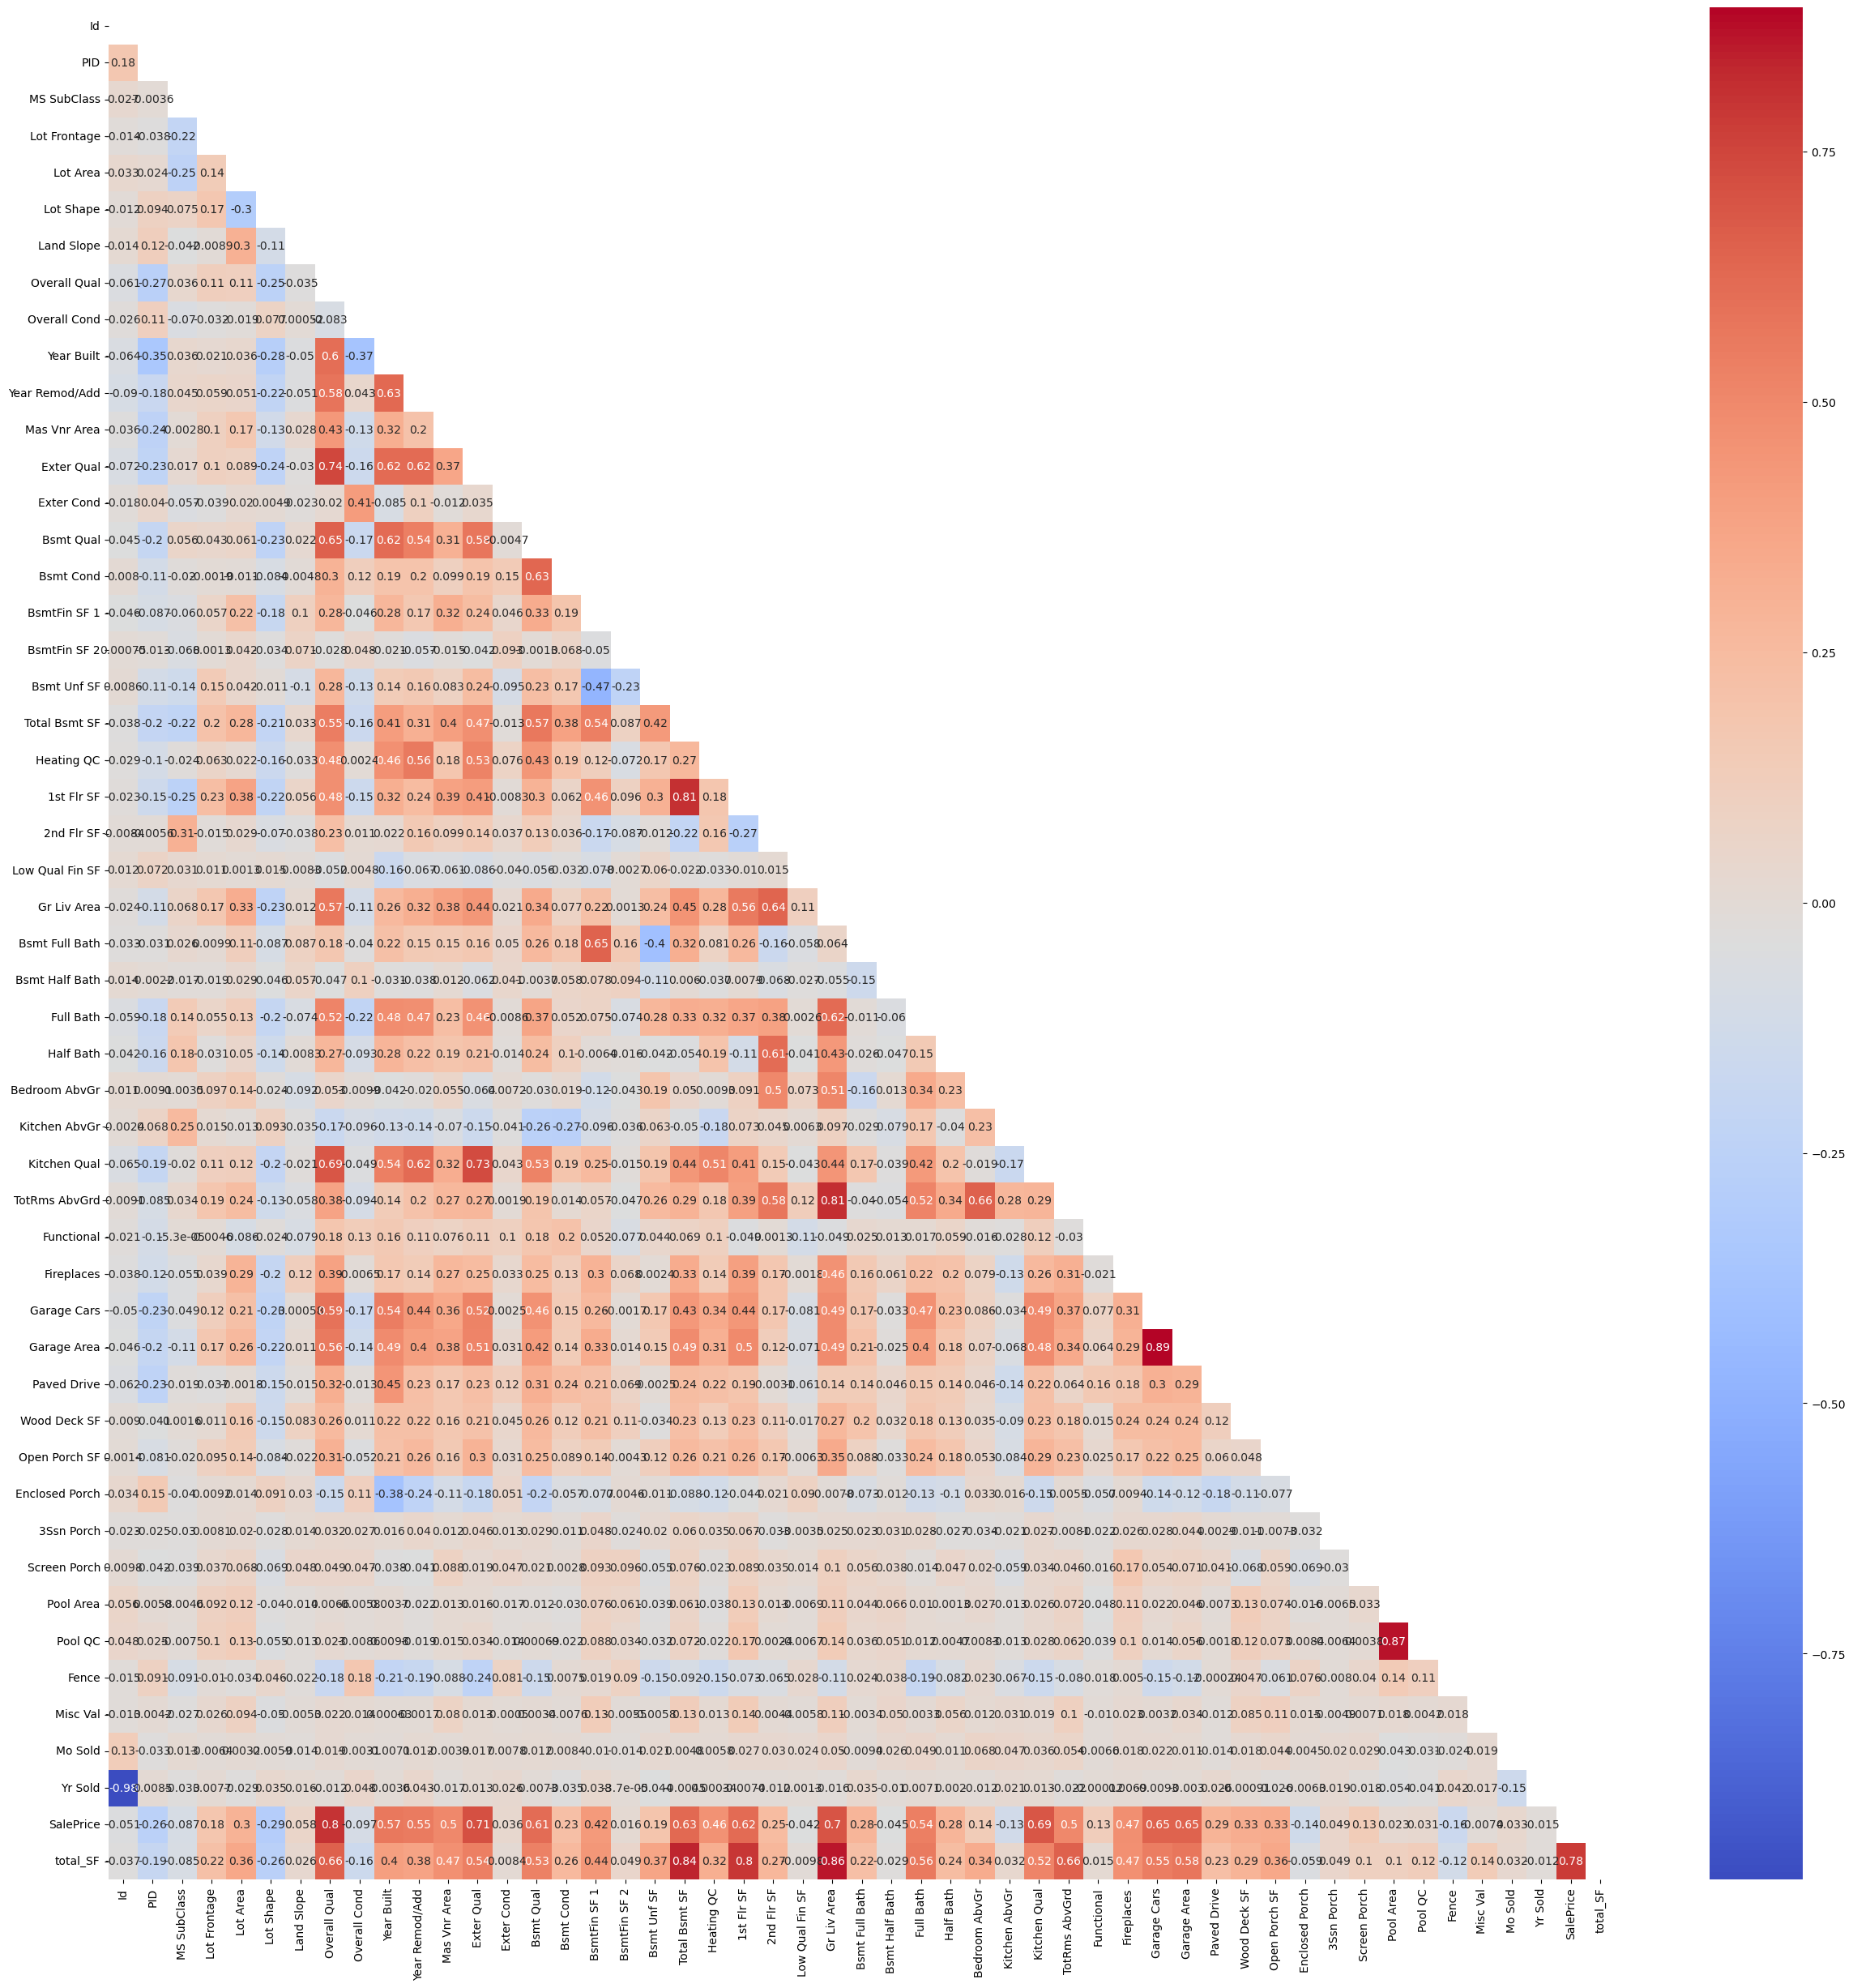

In [12]:
plt.figure(figsize = (30,30))

sns.heatmap(df.corr(),
            annot = True,
            cmap = 'coolwarm',
            mask = np.triu(np.ones_like(df.corr())))

In [ ]:
df.corr()

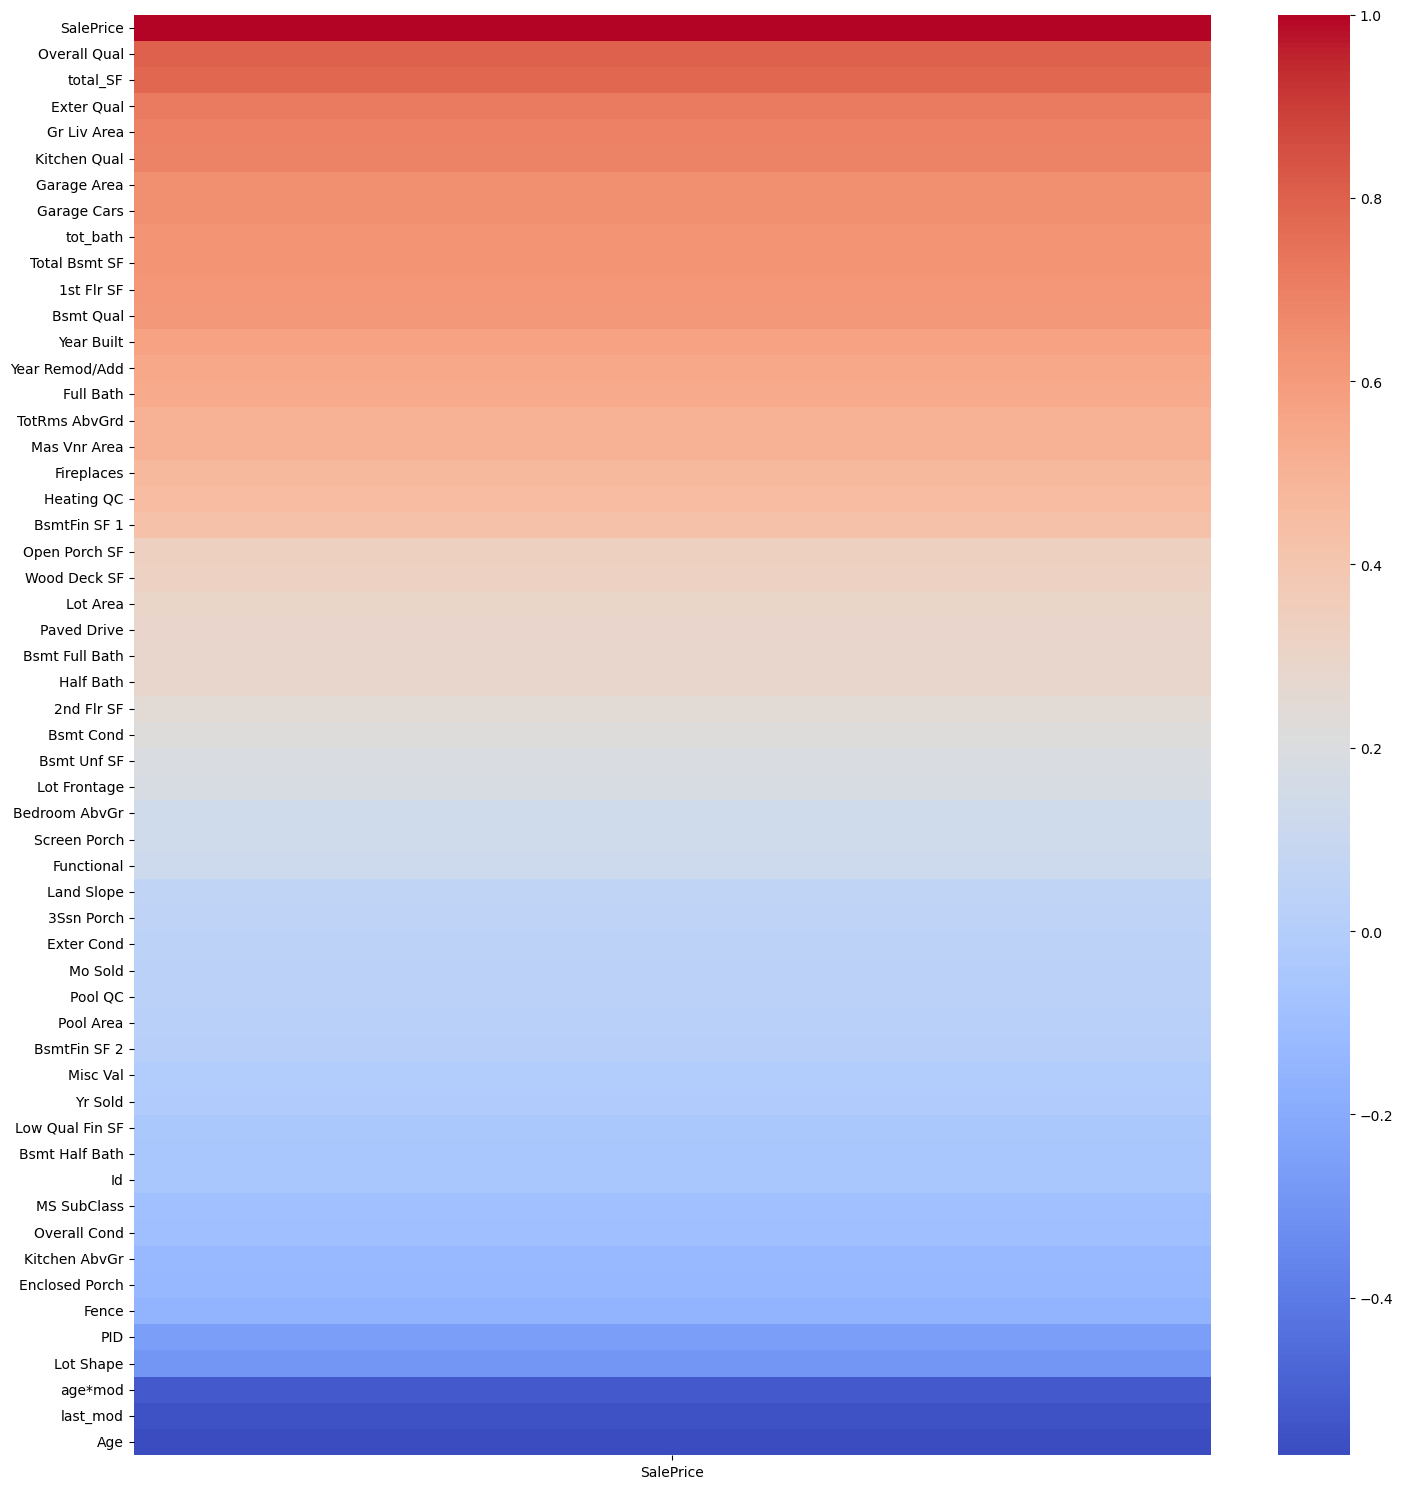

In [68]:
plt.figure(figsize=(15,15))
sns.heatmap(df.corr()[['SalePrice']].sort_values(by = ['SalePrice'], ascending = False), cmap = 'coolwarm')
plt.tight_layout()
plt.savefig('../visuals/corr_map.png')

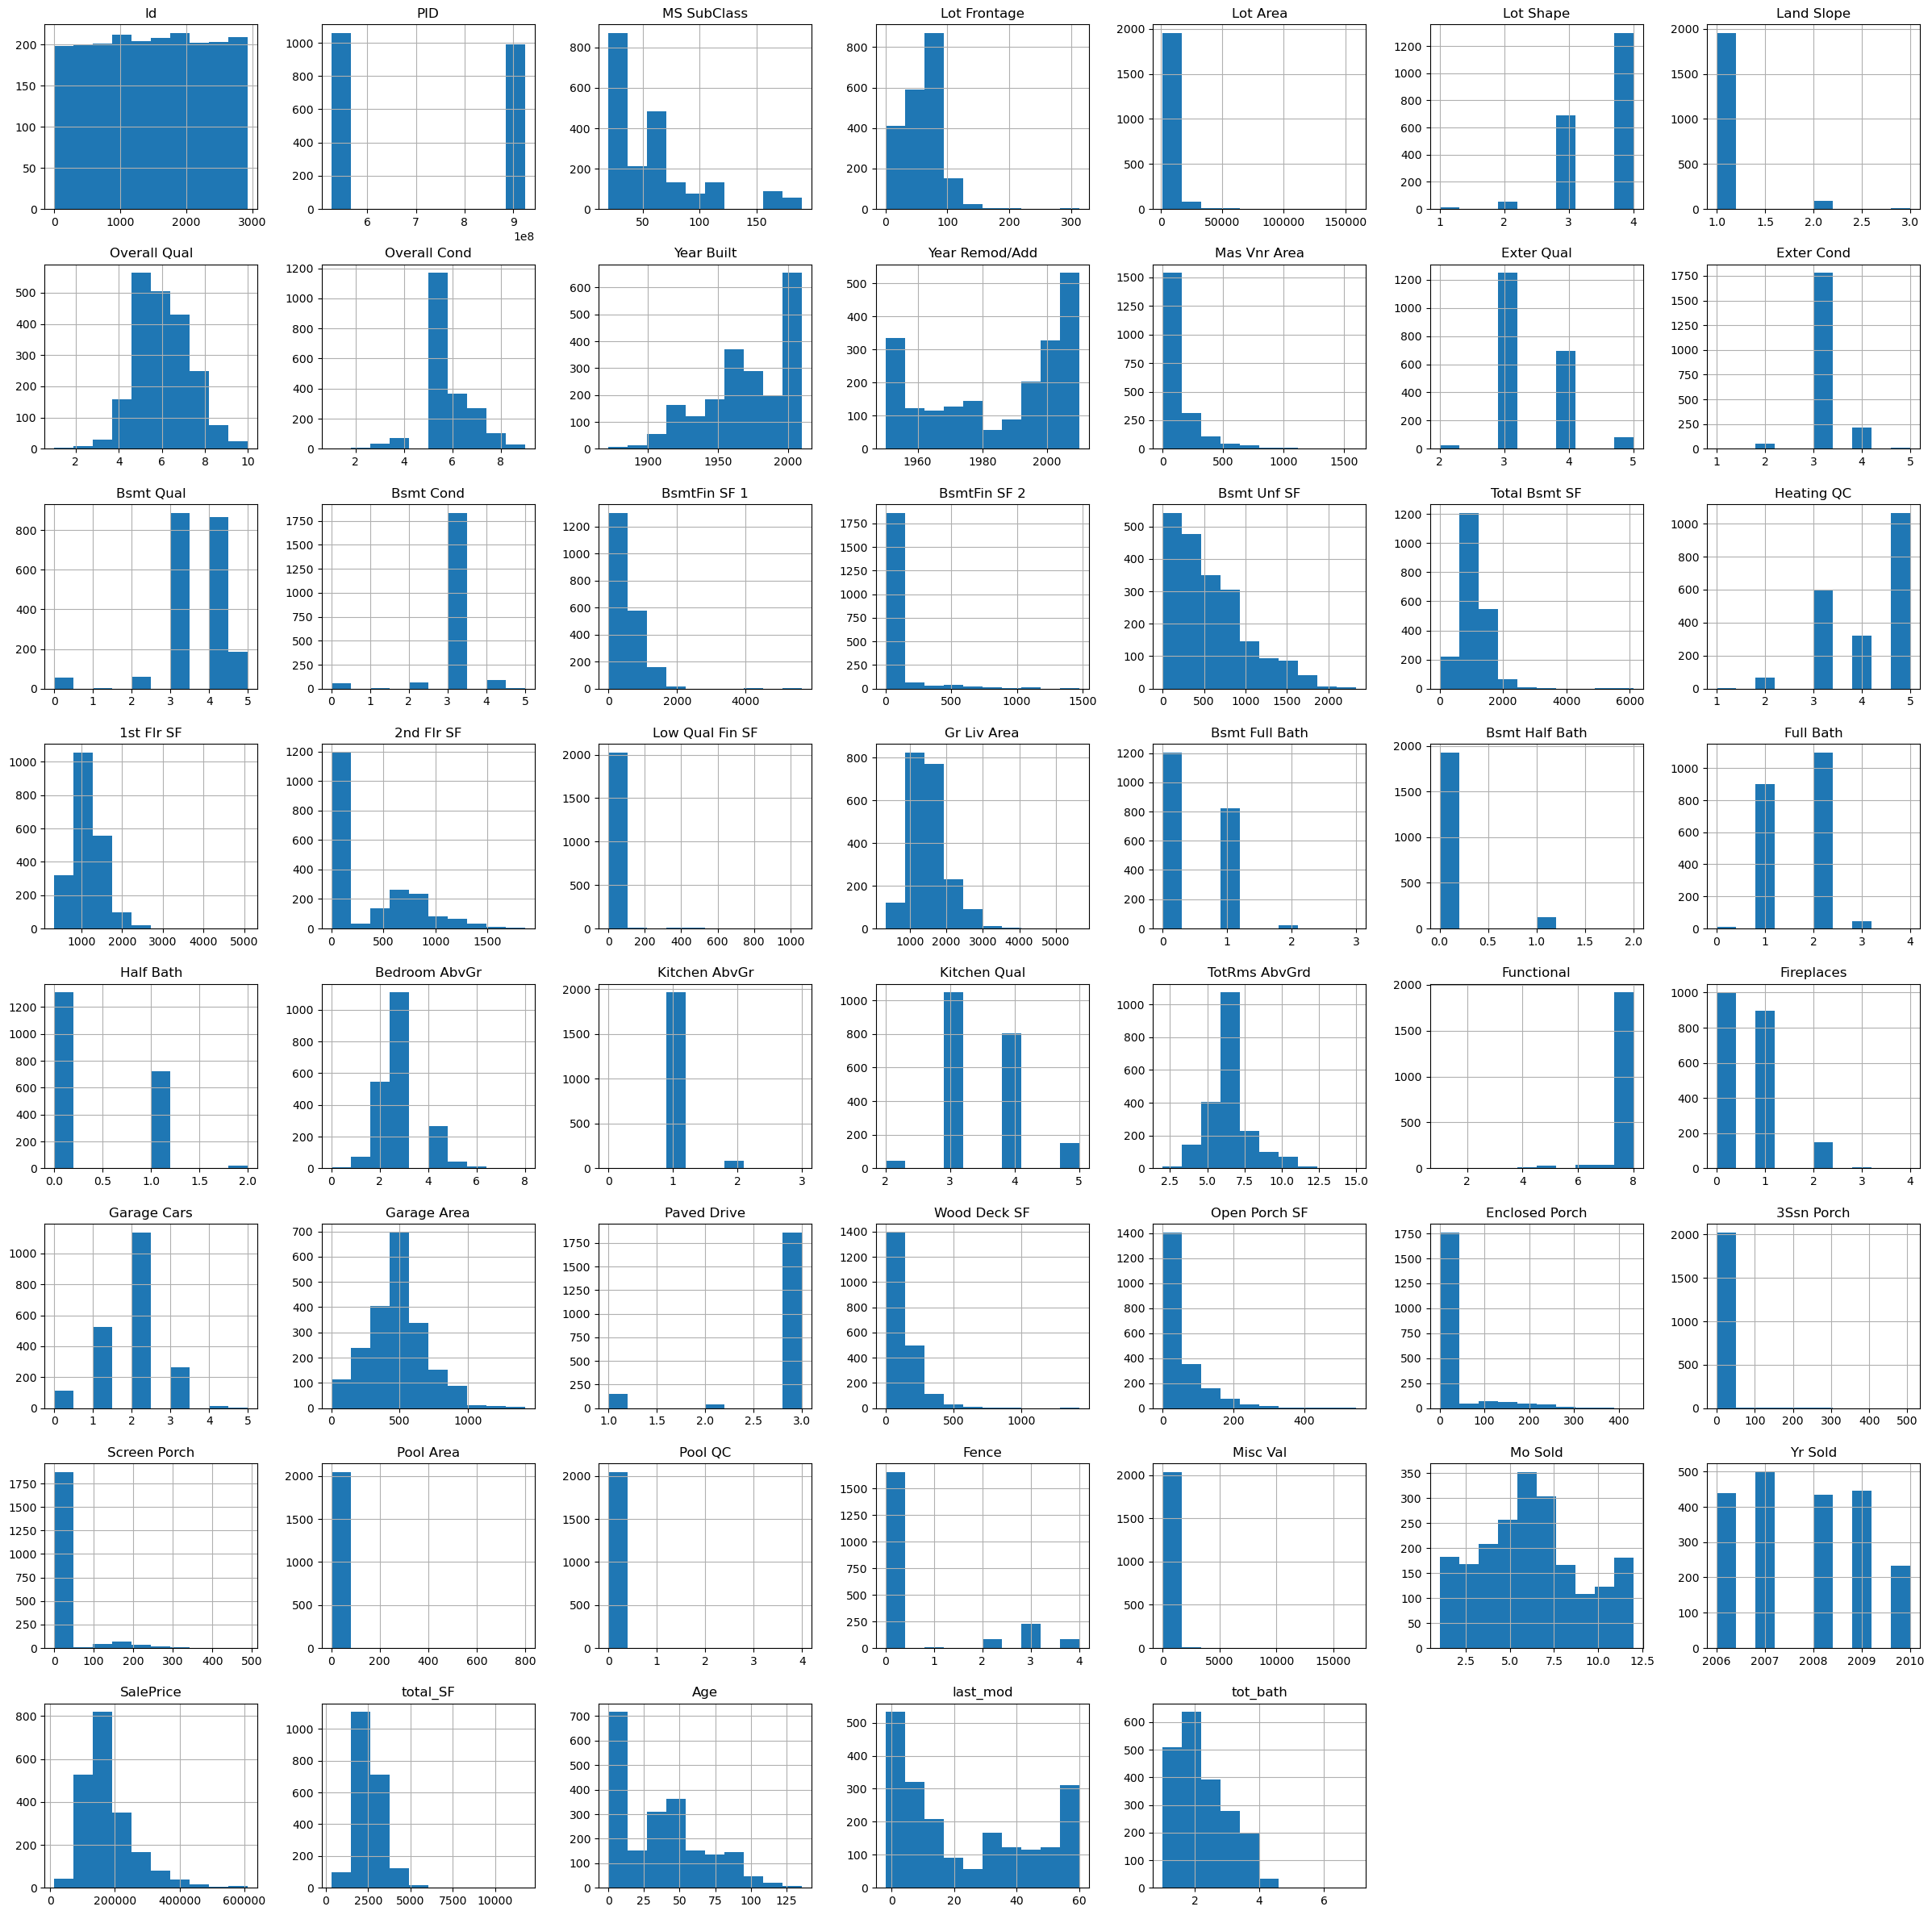

In [33]:
df.hist(figsize = (30,30));

In [50]:
features = ['Overall Qual', 'Exter Qual','Bsmt Qual', 'Total Bsmt SF','1st Flr SF', 'GR Liv Area','total_SF', 'Kitchen Qual','Garage Area','Age','last_mod','tot_bath', 'Lot Shape']

<AxesSubplot:xlabel='Lot Area'>

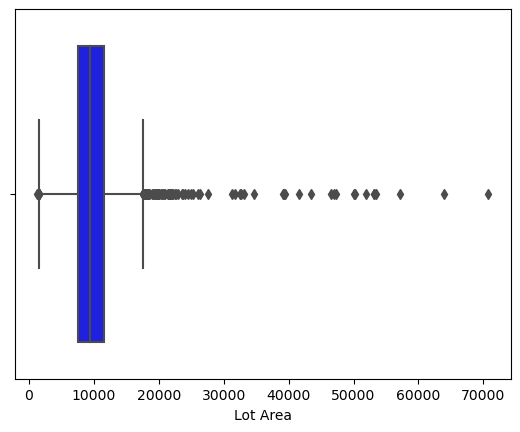

In [43]:
sns.boxplot(x = df['Lot Area'], color = 'b')

In [41]:
df.loc[df['Lot Area'] > 100000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,total_SF,Age,last_mod,tot_bath


In [40]:
df.drop(index = [471, 694], inplace = True)

<AxesSubplot:xlabel='SalePrice'>

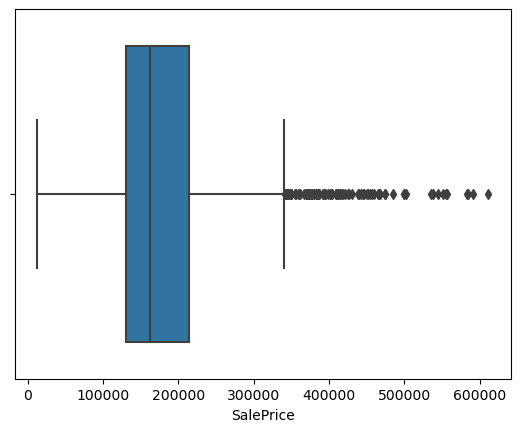

In [36]:
sns.boxplot(x = df['SalePrice'])

In [37]:
df.loc[df['SalePrice'] > 500000]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice,total_SF,Age,last_mod,tot_bath
81,367,527214050,20,RL,63.0,17423,Pave,NA,3,Lvl,AllPub,CulDSac,1,StoneBr,Norm,Norm,1Fam,1Story,9,5,2008,2009,Hip,CompShg,VinylSd,VinylSd,Stone,748.0,5,3,PConc,5,3,No,GLQ,1904.0,Unf,0.0,312.0,2216.0,GasA,5,Y,SBrkr,2234,0,0,2234,1.0,0.0,2,0,1,1,5,9,8,1,Gd,Attchd,2009.0,Fin,3.0,1166.0,TA,TA,3,0,60,0,0,0,0,0,0,NA,0,7,2009,New,501837,4450.0,1,0,3.0
138,2331,527210040,60,RL,60.0,18062,Pave,NA,3,HLS,AllPub,CulDSac,1,StoneBr,Norm,Norm,1Fam,2Story,10,5,2006,2006,Hip,CompShg,CemntBd,CmentBd,BrkFace,662.0,5,3,PConc,5,3,Gd,Unf,0.0,Unf,0.0,1528.0,1528.0,GasA,5,Y,SBrkr,1528,1862,0,3390,0.0,0.0,3,1,5,1,5,10,8,1,Ex,BuiltIn,2006.0,Fin,3.0,758.0,TA,TA,3,204,34,0,0,0,0,0,0,NA,0,9,2006,New,545224,4918.0,0,0,3.5
151,2333,527212030,60,RL,85.0,16056,Pave,NA,3,Lvl,AllPub,Inside,1,StoneBr,Norm,Norm,1Fam,2Story,9,5,2005,2006,Hip,CompShg,CemntBd,CmentBd,Stone,208.0,4,3,PConc,5,3,Av,GLQ,240.0,Unf,0.0,1752.0,1992.0,GasA,5,Y,SBrkr,1992,876,0,2868,0.0,0.0,3,1,4,1,5,11,8,1,Gd,BuiltIn,2005.0,Fin,3.0,716.0,TA,TA,3,214,108,0,0,0,0,0,0,NA,0,7,2006,New,556581,4860.0,1,0,3.5
623,457,528176030,20,RL,100.0,14836,Pave,NA,3,HLS,AllPub,Inside,2,NridgHt,Norm,Norm,1Fam,1Story,10,5,2004,2005,Hip,CompShg,CemntBd,CmentBd,Stone,730.0,5,3,PConc,5,3,Gd,GLQ,2146.0,Unf,0.0,346.0,2492.0,GasA,5,Y,SBrkr,2492,0,0,2492,1.0,0.0,2,1,2,1,5,8,8,1,Ex,Attchd,2004.0,Fin,3.0,949.0,TA,TA,3,226,235,0,0,0,0,0,0,NA,0,2,2009,WD,552000,4984.0,5,4,3.5
800,1702,528118050,20,RL,59.0,17169,Pave,NA,2,Lvl,AllPub,CulDSac,1,NridgHt,Norm,Norm,1Fam,1Story,10,5,2007,2007,Hip,CompShg,CemntBd,CmentBd,BrkFace,970.0,5,3,PConc,5,3,Av,GLQ,1684.0,Unf,0.0,636.0,2320.0,GasA,5,Y,SBrkr,2290,0,0,2290,2.0,0.0,2,1,2,1,5,7,8,1,Gd,Attchd,2007.0,Fin,3.0,1174.0,TA,TA,3,192,30,0,0,0,0,0,0,NA,0,8,2007,New,500067,4610.0,0,0,4.5
823,16,527216070,60,RL,47.0,53504,Pave,NA,2,HLS,AllPub,CulDSac,2,StoneBr,Norm,Norm,1Fam,2Story,8,5,2003,2003,Hip,CompShg,CemntBd,Wd Shng,BrkFace,603.0,5,3,PConc,4,3,Gd,ALQ,1416.0,Unf,0.0,234.0,1650.0,GasA,5,Y,SBrkr,1690,1589,0,3279,1.0,0.0,3,1,4,1,5,12,5,1,Gd,BuiltIn,2003.0,Fin,3.0,841.0,TA,TA,3,503,36,0,0,210,0,0,0,NA,0,6,2010,WD,538000,4929.0,7,7,4.5
1164,424,528106020,20,RL,105.0,15431,Pave,NA,4,Lvl,AllPub,Inside,1,NridgHt,Norm,Norm,1Fam,1Story,10,5,2008,2008,Hip,CompShg,VinylSd,VinylSd,Stone,200.0,5,3,PConc,5,3,Gd,GLQ,1767.0,ALQ,539.0,788.0,3094.0,GasA,5,Y,SBrkr,2402,0,0,2402,1.0,0.0,2,0,2,1,5,10,8,2,Gd,Attchd,2008.0,Fin,3.0,672.0,TA,TA,3,0,72,0,0,170,0,0,0,NA,0,4,2009,WD,555000,5496.0,1,1,3.0
1592,2335,527214060,60,RL,82.0,16052,Pave,NA,3,Lvl,AllPub,CulDSac,1,StoneBr,Norm,Norm,1Fam,2Story,10,5,2006,2006,Hip,CompShg,VinylSd,VinylSd,Stone,734.0,5,3,PConc,5,3,No,GLQ,1206.0,Unf,0.0,644.0,1850.0,GasA,5,Y,SBrkr,1850,848,0,2698,1.0,0.0,2,1,4,1,5,11,8,1,Gd,Attchd,2006.0,RFn,3.0,736.0,TA,TA,3,250,0,0,0,0,0,0,0,NA,0,7,2006,New,535000,4548.0,0,0,3.5
1671,45,528150070,20,RL,100.0,12919,Pave,NA,3,Lvl,AllPub,Inside,1,NridgHt,Norm,Norm,1Fam,1Story,9,5,2009,2010,Hip,CompShg,VinylSd,VinylSd,Stone,760.0,5,3,PConc,5,3,Gd,GLQ,2188.0,Unf,0.0,142.0,2330.0,GasA,5,Y,SBrkr,2364,0

In [53]:
tf.loc[(tf['Garage Type'].isna() == False) & (tf['Garage Finish'].isna() == True)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type
764,1357,903426160,60,RM,57.0,8094,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,OldTown,Norm,Norm,2fmCon,2.5Unf,6,8,1910,1983,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,TA,TA,PConc,TA,TA,Mn,Rec,196,Unf,0,1046,1242,GasA,Gd,Y,SBrkr,1242,742,0,1984,0,0,2,0,5,1,TA,8,Typ,0,NaN,Detchd,NaN,NaN,1,360,NaN,NaN,Y,64,0,180,0,0,0,NaN,MnPrv,Shed,1000,9,2008,WD


In [54]:
tf.iloc[764]

Id                      1357
PID                903426160
MS SubClass               60
MS Zoning                 RM
Lot Frontage            57.0
Lot Area                8094
Street                  Pave
Alley                   Grvl
Lot Shape                Reg
Land Contour             Lvl
Utilities             AllPub
Lot Config            Inside
Land Slope               Gtl
Neighborhood         OldTown
Condition 1             Norm
Condition 2             Norm
Bldg Type             2fmCon
House Style           2.5Unf
Overall Qual               6
Overall Cond               8
Year Built              1910
Year Remod/Add          1983
Roof Style             Gable
Roof Matl            CompShg
Exterior 1st         Wd Sdng
Exterior 2nd         Wd Sdng
Mas Vnr Type            None
Mas Vnr Area             0.0
Exter Qual                TA
Exter Cond                TA
Foundation             PConc
Bsmt Qual                 TA
Bsmt Cond                 TA
Bsmt Exposure             Mn
BsmtFin Type 1

In [31]:
df.groupby('Heating')['Electrical'].value_counts()

Heating  Electrical
GasA     SBrkr         1847
         FuseA          133
         FuseF           30
         FuseP            7
         Mix              1
GasW     SBrkr           18
         FuseA            2
Grav     FuseA            2
         FuseF            2
         SBrkr            1
OthW     SBrkr            2
Wall     FuseA            3
         FuseF            3
Name: Electrical, dtype: int64

In [85]:
df['Mas Vnr Type'].value_counts()

None       1218
BrkFace     630
Stone       168
BrkCmn       13
Name: Mas Vnr Type, dtype: int64

In [43]:
plt.scatter(data = df, x = df['Sale Price'], y = ['Gr Liv Area'], s = 2)

KeyError: 'Sale Price'

In [93]:
df.loc[df['Mas Vnr Type'].isna() == True]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
22,2393,528142010,60,RL,103.0,12867,Pave,NA,IR1,Lvl,AllPub,Corner,Gtl,NridgHt,Norm,Norm,1Fam,2Story,8,5,2005,2006,Gable,CompShg,CemntBd,CmentBd,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,Unf,0.0,Unf,0.0,1209.0,1209.0,GasA,Ex,Y,SBrkr,1209,1044,0,2253,0.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2005.0,Fin,2.0,575.0,TA,TA,Y,243,142,0,0,0,0,NA,NA,NA,0,7,2006,New,344133
41,2383,528110050,20,RL,107.0,13891,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,NridgHt,Norm,Norm,1Fam,1Story,10,5,2006,2006,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Ex,TA,PConc,Ex,Gd,Gd,GLQ,1386.0,Unf,0.0,690.0,2076.0,GasA,Ex,Y,SBrkr,2076,0,0,2076,1.0,0.0,2,1,2,1,Ex,7,Typ,1,Gd,Attchd,2006.0,Fin,3.0,850.0,TA,TA,Y,216,229,0,0,0,0,NA,NA,NA,0,9,2006,New,465000
86,539,531371050,20,RL,67.0,10083,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,SawyerW,Norm,Norm,1Fam,1Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,833.0,Unf,0.0,343.0,1176.0,GasA,Ex,Y,SBrkr,1200,0,0,1200,1.0,0.0,2,0,2,1,Gd,5,Typ,0,NA,Attchd,2003.0,RFn,2.0,555.0,TA,TA,Y,0,41,0,0,0,0,NA,NA,NA,0,8,2009,WD,184900
212,518,528458020,20,FV,90.0,7993,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,7,5,2008,2009,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,Unf,0.0,Unf,0.0,1436.0,1436.0,GasA,Ex,Y,SBrkr,1436,0,0,1436,0.0,0.0,2,0,3,1,Gd,6,Typ,0,NA,Attchd,2008.0,Fin,2.0,529.0,TA,TA,Y,0,121,0,0,0,0,NA,NA,NA,0,10,2009,New,225000
276,2824,908130020,20,RL,75.0,8050,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Edwards,Norm,Norm,1Fam,1Story,6,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,TA,TA,PConc,Gd,TA,Av,GLQ,475.0,ALQ,297.0,142.0,914.0,GasA,Ex,Y,SBrkr,914,0,0,914,1.0,0.0,1,0,2,1,Gd,4,Typ,0,NA,NA,NA,NA,0.0,0.0,NA,NA,N,32,0,0,0,0,0,NA,NA,NA,0,4,2006,WD,117250
338,1800,528458150,60,FV,112.0,12217,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,2Story,8,5,2007,2007,Hip,CompShg,WdShing,Wd Shng,NaN,NaN,Gd,TA,PConc,Ex,TA,Av,GLQ,745.0,Unf,0.0,210.0,955.0,GasA,Ex,Y,SBrkr,955,925,0,1880,1.0,0.0,2,1,3,1,Ex,8,Typ,1,Gd,Attchd,2007.0,Fin,3.0,880.0,TA,TA,Y,168,127,0,0,0,0,NA,NA,NA,0,12,2007,New,310013
431,1455,907251090,60,RL,75.0,9473,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,8,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,804.0,Unf,0.0,324.0,1128.0,GasA,Ex,Y,SBrkr,1128,903,0,2031,1.0,0.0,2,1,3,1,Gd,7,Typ,1,Gd,Attchd,2002.0,RFn,2.0,577.0,TA,TA,Y,0,211,0,0,0,0,NA,NA,NA,0,3,2008,WD,237000
451,1120,528439010,20,RL,87.0,10037,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Feedr,Norm,1Fam,1Story,8,5,2006,2007,Hip,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Ex,TA,No,GLQ,666.0,Unf,0.0,794.0,1460.0,GasA,Ex,Y,SBrkr,1460,0,0,1460,0.0,0.0,2,0,3,1,Gd,6,Typ,1,Gd,Attchd,2006.0,Fin,2.0,480.0,TA,TA,Y,0,20,0,0,0,0,NA,NA,NA,0,8,2008,WD,247000
591,1841,533208040,120,FV,35.0,4274,Pave,Pave,IR1,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,TwnhsE,1Story,7,5,2006,2007,Gable,CompShg,VinylSd,VinylSd,NaN,NaN,Gd,TA,PConc,Gd,TA,No,GLQ,1106.0,Unf,0.0,135.0,1241.0,GasA,Ex,Y,SBrkr,1241,0,0,1241,1.0,0.0,1,1,1,1,Gd,4,Typ,0,NA,Attchd,2007.0,Fin,2.0,569.0,TA,TA,Y,0,116,0,0,0,0,NA,NA,NA,0,11,2007

In [63]:
df['Bsmt Full Bath'].value_counts(dropna = False)

0.0    1200
1.0     824
2.0      23
NaN       2
3.0       2
Name: Bsmt Full Bath, dtype: int64

In [71]:
df.loc[(df['Bsmt Exposure'].isna() == True) & (df['Bsmt Qual'].isna() == False)]

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,Utilities,Lot Config,Land Slope,Neighborhood,Condition 1,Condition 2,Bldg Type,House Style,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Roof Style,Roof Matl,Exterior 1st,Exterior 2nd,Mas Vnr Type,Mas Vnr Area,Exter Qual,Exter Cond,Foundation,Bsmt Qual,Bsmt Cond,Bsmt Exposure,BsmtFin Type 1,BsmtFin SF 1,BsmtFin Type 2,BsmtFin SF 2,Bsmt Unf SF,Total Bsmt SF,Heating,Heating QC,Central Air,Electrical,1st Flr SF,2nd Flr SF,Low Qual Fin SF,Gr Liv Area,Bsmt Full Bath,Bsmt Half Bath,Full Bath,Half Bath,Bedroom AbvGr,Kitchen AbvGr,Kitchen Qual,TotRms AbvGrd,Functional,Fireplaces,Fireplace Qu,Garage Type,Garage Yr Blt,Garage Finish,Garage Cars,Garage Area,Garage Qual,Garage Cond,Paved Drive,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,SalePrice
1456,1797,528458090,60,FV,81.0,10411,Pave,NA,Reg,Lvl,AllPub,Corner,Gtl,Somerst,Norm,Norm,1Fam,2Story,5,5,2007,2007,Gable,CompShg,VinylSd,VinylSd,None,0.0,Gd,TA,CBlock,Gd,TA,NaN,Unf,0.0,Unf,0.0,725.0,725.0,GasA,Ex,Y,SBrkr,725,863,0,1588,0.0,0.0,3,0,3,1,Gd,8,Typ,0,NaN,Attchd,2007.0,Unf,2.0,561.0,TA,TA,Y,0,0,0,0,0,0,NA,NA,NA,0,7,2007,New,212109
1547,67,528445060,20,RL,73.0,8987,Pave,NA,Reg,Lvl,AllPub,Inside,Gtl,Somerst,Norm,Norm,1Fam,1Story,8,5,2005,2006,Gable,CompShg,VinylSd,VinylSd,BrkFace,226.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,1595.0,1595.0,GasA,Ex,Y,SBrkr,1595,0,0,1595,0.0,0.0,2,0,2,1,Gd,6,Typ,1,Gd,Attchd,2005.0,RFn,3.0,880.0,TA,TA,Y,144,0,0,0,0,0,NA,NA,NA,0,5,2010,WD,221500
1997,2780,907194130,60,RL,65.0,14006,Pave,NA,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2002,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,144.0,Gd,TA,PConc,Gd,TA,NaN,Unf,0.0,Unf,0.0,936.0,936.0,GasA,Ex,Y,SBrkr,936,840,0,1776,0.0,0.0,2,1,3,1,Gd,7,Typ,1,TA,Attchd,2002.0,RFn,2.0,474.0,TA,TA,Y,144,96,0,0,0,0,NA,NA,NA,0,2,2006,WD,192500


In [83]:
df.iloc[1147]

Id                       445
PID                528142130
MS SubClass               20
MS Zoning                 RL
Lot Frontage            85.0
Lot Area               10655
Street                  Pave
Alley                     NA
Lot Shape                IR1
Land Contour             Lvl
Utilities             AllPub
Lot Config            Inside
Land Slope               Gtl
Neighborhood         NridgHt
Condition 1             Norm
Condition 2             Norm
Bldg Type               1Fam
House Style           1Story
Overall Qual               8
Overall Cond               5
Year Built              2003
Year Remod/Add          2004
Roof Style             Gable
Roof Matl            CompShg
Exterior 1st         VinylSd
Exterior 2nd         VinylSd
Mas Vnr Type         BrkFace
Mas Vnr Area           296.0
Exter Qual                Gd
Exter Cond                TA
Foundation             PConc
Bsmt Qual                 Gd
Bsmt Cond                 TA
Bsmt Exposure             No
BsmtFin Type 1

In [75]:
df['BsmtFin Type 2'].value_counts()

Unf    1749
Rec      80
LwQ      60
BLQ      48
ALQ      35
GLQ      23
Name: BsmtFin Type 2, dtype: int64

In [76]:
df['Bsmt Exposure'].value_counts()

No    1339
Av     288
Gd     203
Mn     163
Name: Bsmt Exposure, dtype: int64

In [6]:
tf.isna().sum()

Id                   0
PID                  0
MS SubClass          0
MS Zoning            0
Lot Frontage       160
Lot Area             0
Street               0
Alley              820
Lot Shape            0
Land Contour         0
Utilities            0
Lot Config           0
Land Slope           0
Neighborhood         0
Condition 1          0
Condition 2          0
Bldg Type            0
House Style          0
Overall Qual         0
Overall Cond         0
Year Built           0
Year Remod/Add       0
Roof Style           0
Roof Matl            0
Exterior 1st         0
Exterior 2nd         0
Mas Vnr Type         1
Mas Vnr Area         1
Exter Qual           0
Exter Cond           0
Foundation           0
Bsmt Qual           25
Bsmt Cond           25
Bsmt Exposure       25
BsmtFin Type 1      25
BsmtFin SF 1         0
BsmtFin Type 2      25
BsmtFin SF 2         0
Bsmt Unf SF          0
Total Bsmt SF        0
Heating              0
Heating QC           0
Central Air          0
Electrical 

In [7]:
tf['Lot Frontage']
tf['Alley']

tf['Mas Vnr Type']
tf['Mas Vnr Area']

tf['Bsmt Qual']
tf['Bsmt Cond']
tf['Bsmt Exposure']
tf['BsmtFin Type 1']

tf['BsmtFin Type 2']
tf['Electrical']
tf['Fireplace Qu']
tf['Garage Type']
tf['Garage Yr Blt']
tf['Garage Finish']

tf['Garage Qual']
tf['Garage Con']

tf['Pool QC']
tf['Fence']
tf['Misc Feature']

KeyError: 'Garage Con'